In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/game-recommendations-on-steam/games_metadata.json
/kaggle/input/game-recommendations-on-steam/users.csv
/kaggle/input/game-recommendations-on-steam/games.csv
/kaggle/input/game-recommendations-on-steam/recommendations.csv


In [23]:
from matplotlib import pyplot as plt

In [24]:
metadata = pd.read_json('/kaggle/input/game-recommendations-on-steam/games_metadata.json', lines=True)

In [25]:
# Vamos a cargar las bases de datos de los juegos
df = pd.read_csv('/kaggle/input/game-recommendations-on-steam/games.csv')
df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48849,1769980,Mask of the Rose,2023-06-08,True,True,True,Mixed,43,48,19.99,19.99,0.0,True
48850,2399890,Warhammer 40000: Gladius - Firepower Pack,2023-05-25,True,False,True,Positive,96,25,6.99,6.99,0.0,True
48851,1905020,Greyhill Incident,2023-06-09,True,False,False,Mostly Negative,30,191,24.99,24.99,0.0,True
48852,2439040,Black Desert - [Pre-Order] Land of the Morning...,2023-05-25,True,False,False,Mostly Positive,75,12,49.99,49.99,0.0,True


In [26]:
#Mostramos info de df juegos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48854 entries, 0 to 48853
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          48854 non-null  int64  
 1   title           48854 non-null  object 
 2   date_release    48854 non-null  object 
 3   win             48854 non-null  bool   
 4   mac             48854 non-null  bool   
 5   linux           48854 non-null  bool   
 6   rating          48854 non-null  object 
 7   positive_ratio  48854 non-null  int64  
 8   user_reviews    48854 non-null  int64  
 9   price_final     48854 non-null  float64
 10  price_original  48854 non-null  float64
 11  discount        48854 non-null  float64
 12  steam_deck      48854 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.5+ MB


In [27]:
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True


/tmp/ipykernel_32/3581803363.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmax=0.8, cmap='GnBu', annot=True)  # Crea un mapa de calor de la matriz de correlación del DataFrame


<Axes: title={'center': 'Pearson'}>

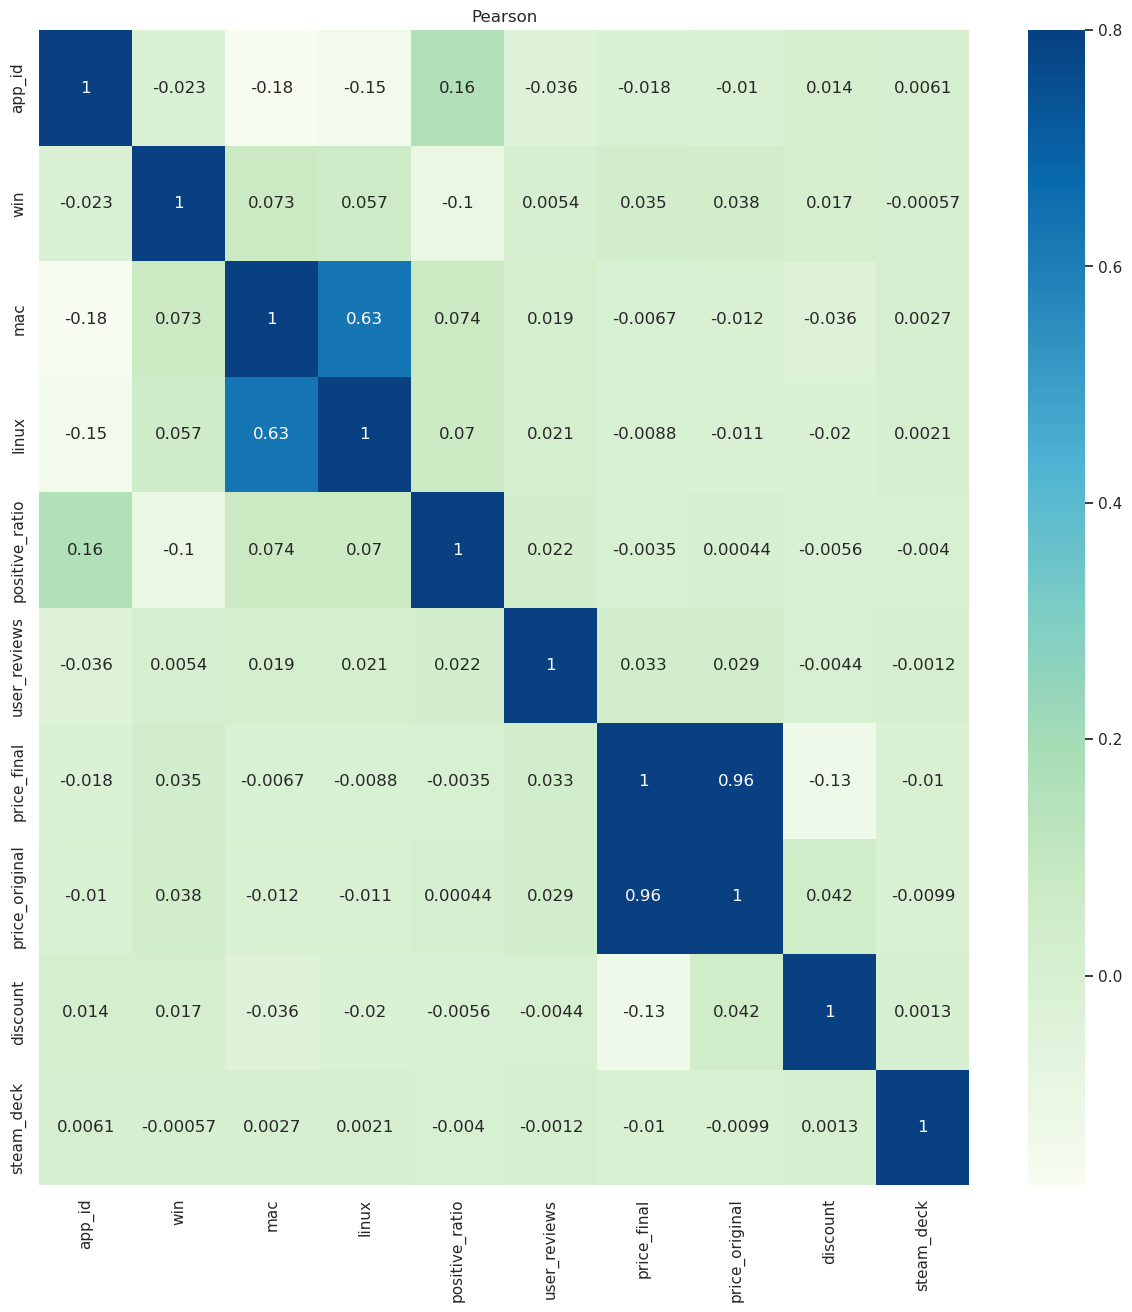

In [28]:
#Grafica de Pearson para la base de datos de juegos
import seaborn as sns  # Importa la biblioteca seaborn para visualización de datos avanzada
sns.set(style='whitegrid', font_scale=1)  # Configura el estilo de gráfico y el tamaño de la fuente
plt.figure(figsize=(15, 15))  # Crea una figura de matplotlib con un tamaño específico
plt.title('Pearson')  # Establece el título del gráfico como 'Pearson'
sns.heatmap(df.corr(), vmax=0.8, cmap='GnBu', annot=True)  # Crea un mapa de calor de la matriz de correlación del DataFrame

In [29]:
# Vamos a cargar las bases de datos de recomendados
rc = pd.read_csv('/kaggle/input/game-recommendations-on-steam/recommendations.csv')
rc

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,24465,0
1,304390,4,0,2017-02-17,False,11.5,1357,1
2,1085660,2,0,2019-11-17,True,336.5,111499,2
3,703080,0,0,2022-09-23,True,27.4,113772,3
4,526870,0,0,2021-01-10,True,7.9,11167,4
...,...,...,...,...,...,...,...,...
15080350,34030,0,0,2020-03-05,True,625.2,12295,15080350
15080351,219150,0,0,2020-12-18,True,6.2,3668407,15080351
15080352,327030,0,0,2020-11-07,True,39.1,3503253,15080352
15080353,220240,0,0,2014-06-26,False,11.4,6842070,15080353


In [30]:
rc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15080355 entries, 0 to 15080354
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 819.8+ MB


In [31]:
rc.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,24465,0
1,304390,4,0,2017-02-17,False,11.5,1357,1
2,1085660,2,0,2019-11-17,True,336.5,111499,2
3,703080,0,0,2022-09-23,True,27.4,113772,3
4,526870,0,0,2021-01-10,True,7.9,11167,4


/tmp/ipykernel_32/2678360359.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rc.corr(), vmax=0.8, cmap='GnBu', annot=True)  # Crea un mapa de calor de la matriz de correlación del DataFrame rc


<Axes: title={'center': 'Pearson'}>

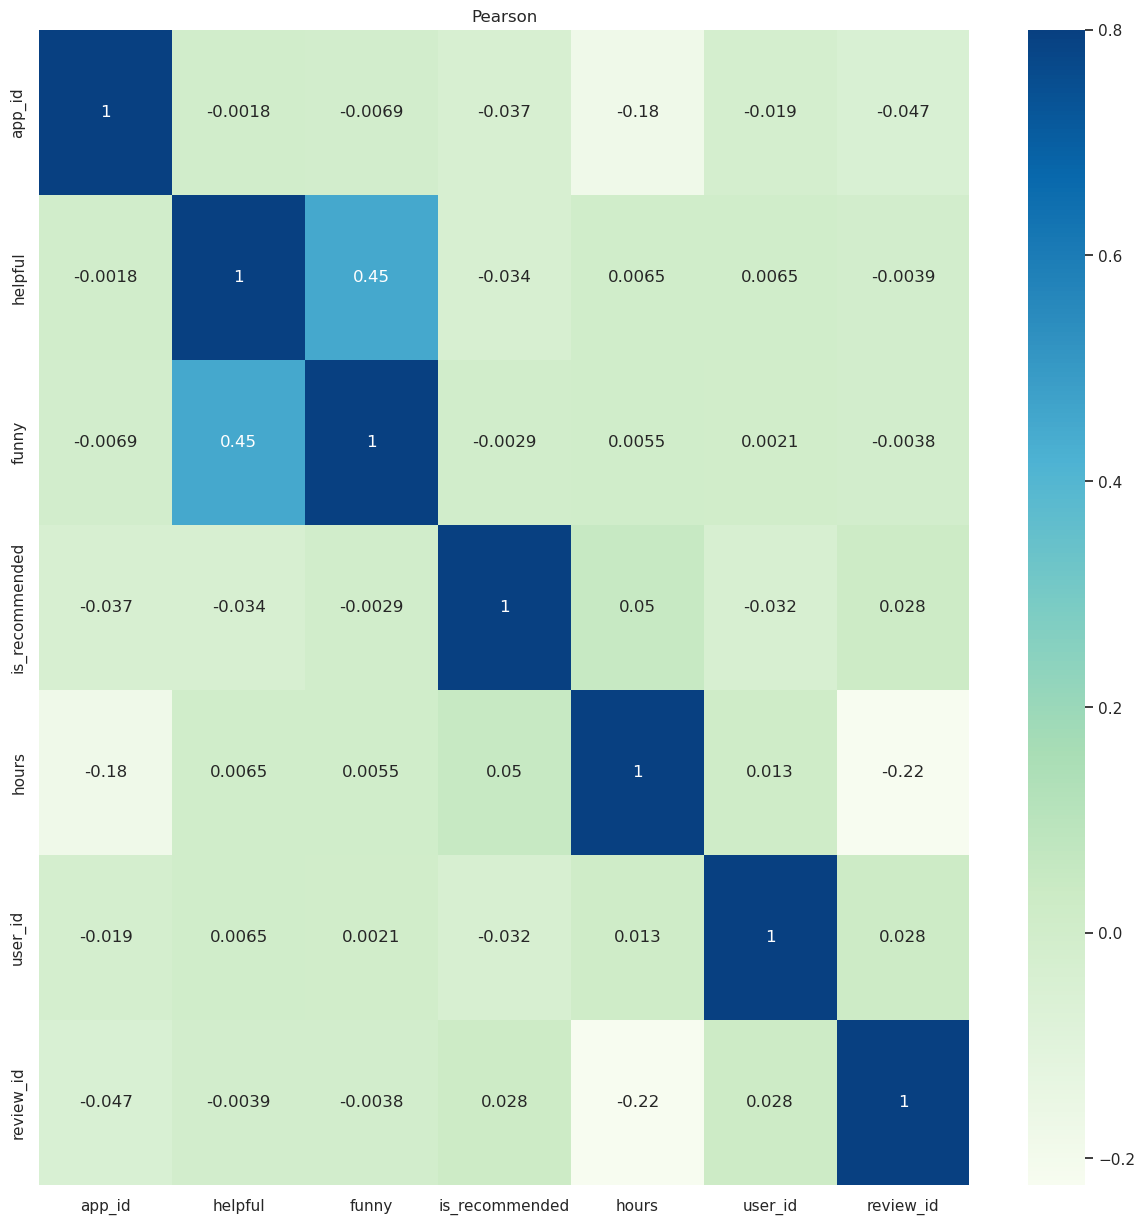

In [32]:
import seaborn as sns  # Importa la biblioteca seaborn para visualización de datos avanzada
sns.set(style='whitegrid', font_scale=1)  # Configura el estilo de gráfico y el tamaño de la fuente
plt.figure(figsize=(15, 15))  # Crea una figura de matplotlib con un tamaño específico
plt.title('Pearson')  # Establece el título del gráfico como 'Pearson'
sns.heatmap(rc.corr(), vmax=0.8, cmap='GnBu', annot=True)  # Crea un mapa de calor de la matriz de correlación del DataFrame rc


In [33]:
# Crea un DataFrame con dos filas y dos columnas
pd.DataFrame([
    ["Recomendas", len(rc.index)],
    ["Juegos", len(df.index)],
], 
columns=["Base_Dados", "Registos"]).style.hide_index() # Aplica estilo para ocultar los índices


/tmp/ipykernel_32/566318494.py:6: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  columns=["Base_Dados", "Registos"]).style.hide_index() # Aplica estilo para ocultar los índices


Base_Dados,Registos
Recomendas,15080355
Juegos,48854


In [34]:
print(df.isnull().sum()) #imprime la cantidad de valores nulos en cada columna

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64


In [35]:
print(df.dtypes)

app_id              int64
title              object
date_release       object
win                  bool
mac                  bool
linux                bool
rating             object
positive_ratio      int64
user_reviews        int64
price_final       float64
price_original    float64
discount          float64
steam_deck           bool
dtype: object


In [36]:
print(rc.isnull().sum()) #imprime la cantidad de valores nulos en cada columna

app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64


In [37]:
print(rc.dtypes)

app_id              int64
helpful             int64
funny               int64
date               object
is_recommended       bool
hours             float64
user_id             int64
review_id           int64
dtype: object


In [38]:
#identifica y muestra los valores duplicados en la columna
duplicated_app_ids = rc['review_id'][rc['review_id'].duplicated()]
print(duplicated_app_ids)
duplicated_app_ids = df['app_id'][df['app_id'].duplicated()]
print(duplicated_app_ids)

Series([], Name: review_id, dtype: int64)
Series([], Name: app_id, dtype: int64)


In [39]:
## Verifique el valor mínimo y máximo en la columna 'price_final' de DataFrame 'games'
print(df['price_final'].min(), df['price_final'].max())

0.0 299.99


In [40]:
def perc_na(df: pd.DataFrame) -> float:
    """Calculates a percentage of missing values in the dataframe."""
    return np.count_nonzero(df.isnull().values) / (df.shape[0] * df.shape[1]) * 100.0


pd.DataFrame([
    ["Recommendacion", perc_na(rc)],
    ["Juegos", perc_na(df)],
    ["Metadata",perc_na(metadata)]
], columns=["Dataframe", "% of missing values"])

,Dataframe,% of missing values
0,Recommendacion,0.0
1,Juegos,0.0
2,Metadata,0.0


In [41]:
df[["positive_ratio", "user_reviews", "price_final", "discount"]].describe(percentiles=[.1, .25, .5, .75, .9]).round(0).T


,count,mean,std,min,10%,25%,50%,75%,90%,max
positive_ratio,48854.0,77.0,18.0,0.0,50.0,66.0,81.0,91.0,96.0,100.0
user_reviews,48854.0,1751.0,37959.0,10.0,12.0,20.0,50.0,213.0,1111.0,6941137.0
price_final,48854.0,9.0,12.0,0.0,0.0,1.0,5.0,12.0,20.0,300.0
discount,48854.0,5.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0


In [42]:
rc[["helpful", "funny", "hours"]].describe(percentiles=[.1, .25, .5, .75, .9]).round(1).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
helpful,15080355.0,3.3,56.0,0.0,0.0,0.0,0.0,0.0,3.0,36212.0
funny,15080355.0,1.1,37.5,0.0,0.0,0.0,0.0,0.0,0.0,28088.0
hours,15080355.0,136.6,201.0,0.0,5.1,15.1,49.0,160.3,417.3,999.9


In [43]:
metadata.head()

,app_id,description,tags
0,10090,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti..."
1,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
2,22364,,[Action]
3,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
4,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."


In [44]:
print(metadata.isnull().sum())

app_id         0
description    0
tags           0
dtype: int64


In [45]:
print(metadata.dtypes)

app_id          int64
description    object
tags           object
dtype: object


In [46]:

juegosdf = df.merge(metadata, on='app_id')

relevant_cols = ['app_id', 'title', 'positive_ratio', 'user_reviews', 'tags']
juegosdf = juegosdf[relevant_cols]

juegosdf = juegosdf.sort_values(by = 'user_reviews', ascending = False)
juegosdf = juegosdf.head(100)
review_avg = juegosdf['user_reviews'].mean()

Tamaño Serie  246
Generos Comunes Prom  8.130081300813009


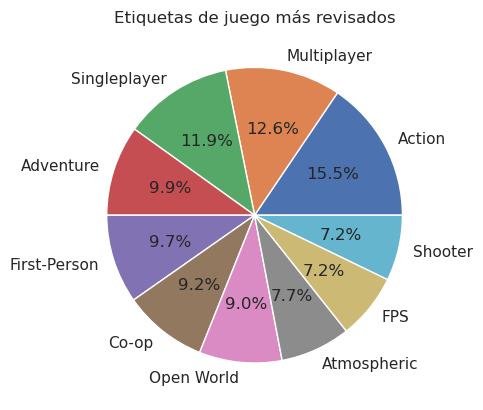

In [47]:
gengraf = juegosdf['tags']
count_list = []
for i in gengraf:
    for j in i:
        count_list.append(j)

gen_clasif = pd.value_counts(np.array(count_list))
gen_clasif = gen_clasif.sort_values(ascending=False)
print("Tamaño Serie ", gen_clasif.size)
print("Generos Comunes Prom ", gen_clasif.mean())


genero = gen_clasif.head(10)
labels = genero.keys()

fig, ax = plt.subplots()
plt.title('Etiquetas de juego más revisados')
pchart = ax.pie(genero, labels = labels, autopct='%1.1f%%')

Tamaño de la serie: 108
Promedio de géneros comunes: 1.8518518518518519


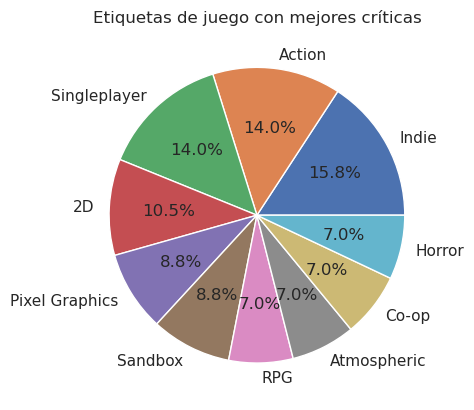

In [48]:
from matplotlib import pyplot as plt

positivedf = juegosdf.sort_values('positive_ratio', ascending=False).head(10)
tags = positivedf['tags']
count_list = []
for i in tags:
    for j in i:
        count_list.append(j)

sorted_tags = pd.value_counts(np.array(count_list))
sorted_tags = sorted_tags.sort_values(ascending=False)
print("Tamaño de la serie:", sorted_tags.size)
print("Promedio de géneros comunes:", sorted_tags.mean())

tag_slice = sorted_tags.head(10)
labels = tag_slice.keys()

fig, ax = plt.subplots()
plt.title('Etiquetas de juego con mejores críticas')
pchart = ax.pie(tag_slice, labels=labels, autopct='%1.1f%%')


In [49]:
for tags in metadata['tags'].explode().unique():
    if tags is not np.nan:
        metadata[tags] = metadata['tags'].apply(lambda x: tags in x)

/tmp/ipykernel_32/2677081229.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metadata[tags] = metadata['tags'].apply(lambda x: tags in x)
/tmp/ipykernel_32/2677081229.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metadata[tags] = metadata['tags'].apply(lambda x: tags in x)
/tmp/ipykernel_32/2677081229.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

In [50]:
metadata.info

<bound method DataFrame.info of         app_id                                        description  \
0        10090  Call of Duty is back, redefining war like you'...   
1        13500  Enter the dark underworld of Prince of Persia ...   
2        22364                                                      
3       113020  Monaco: What's Yours Is Mine is a single playe...   
4       226560  Escape Dead Island is a Survival-Mystery adven...   
...        ...                                                ...   
48849  1769980  A marvellous romance with a hint of murder. Lo...   
48850  2399890                                                      
48851  1905020  This story-driven Survival-Horror game is abou...   
48852  2439040                                                      
48853  2063610  Manage a team of professional cyclists: contro...   

                                                    tags  Zombies  \
0      [Zombies, World War II, FPS, Multiplayer, Acti...     True   
1

In [51]:
metadata.columns
metadata.shape
metadata.dtypes
metadata.describe()
metadata.info()
metadata.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48854 entries, 0 to 48853
Columns: 444 entries, app_id to Fox
dtypes: bool(441), int64(1), object(2)
memory usage: 21.7+ MB


,app_id,description,tags,Zombies,World War II,FPS,Multiplayer,Action,Shooter,Co-op,...,Reboot,Benchmark,Feature Film,Steam Machine,Hockey,8-bit Music,Rugby,Tile-Matching,Coding,Fox
0,10090,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti...",True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre...",False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,22364,,[Action],False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P...",True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
5,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra...",False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,250180,"“METAL SLUG 3”, the masterpiece in SNK’s emble...","[Arcade, Classic, Action, Co-op, Side Scroller...",False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
7,253980,Experience incredibly atmospheric and intense ...,"[RPG, Action, Fantasy, Third Person, Hack and ...",False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,261550,"A strategy/action RPG. Create a character, eng...","[Medieval, Strategy, Open World, RPG, War, Mul...",False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9,271850,,"[Strategy, Simulation, Action, RTS, World War II]",False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
metadata.describe()

,app_id
count,4.885400e+04
mean,1.020460e+06
std,5.874148e+05
min,1.000000e+01
25%,5.151902e+05
50%,9.516650e+05
75%,1.472945e+06
max,2.439040e+06


In [53]:
metadata.dtypes

app_id            int64
description      object
tags             object
Zombies            bool
World War II       bool
                  ...  
8-bit Music        bool
Rugby              bool
Tile-Matching      bool
Coding             bool
Fox                bool
Length: 444, dtype: object

In [54]:
metadata.shape

(48854, 444)

In [55]:
metadata.columns

Index(['app_id', 'description', 'tags', 'Zombies', 'World War II', 'FPS',
       'Multiplayer', 'Action', 'Shooter', 'Co-op',
       ...
       'Reboot', 'Benchmark', 'Feature Film', 'Steam Machine', 'Hockey',
       '8-bit Music', 'Rugby', 'Tile-Matching', 'Coding', 'Fox'],
      dtype='object', length=444)

In [56]:
df.info

<bound method DataFrame.info of         app_id                                              title  \
0        10090                         Call of Duty: World at War   
1        13500                  Prince of Persia: Warrior Within™   
2        22364                            BRINK: Agents of Change   
3       113020                       Monaco: What's Yours Is Mine   
4       226560                                 Escape Dead Island   
...        ...                                                ...   
48849  1769980                                   Mask of the Rose   
48850  2399890          Warhammer 40000: Gladius - Firepower Pack   
48851  1905020                                  Greyhill Incident   
48852  2439040  Black Desert - [Pre-Order] Land of the Morning...   
48853  2063610                           Pro Cycling Manager 2023   

      date_release   win    mac  linux           rating  positive_ratio  \
0       2008-11-18  True  False  False    Very Positive         

In [57]:
df.describe

<bound method NDFrame.describe of         app_id                                              title  \
0        10090                         Call of Duty: World at War   
1        13500                  Prince of Persia: Warrior Within™   
2        22364                            BRINK: Agents of Change   
3       113020                       Monaco: What's Yours Is Mine   
4       226560                                 Escape Dead Island   
...        ...                                                ...   
48849  1769980                                   Mask of the Rose   
48850  2399890          Warhammer 40000: Gladius - Firepower Pack   
48851  1905020                                  Greyhill Incident   
48852  2439040  Black Desert - [Pre-Order] Land of the Morning...   
48853  2063610                           Pro Cycling Manager 2023   

      date_release   win    mac  linux           rating  positive_ratio  \
0       2008-11-18  True  False  False    Very Positive       

In [58]:
rc.describe

<bound method NDFrame.describe of            app_id  helpful  funny        date  is_recommended  hours  user_id  \
0          975370        0      0  2022-12-12            True   36.3    24465   
1          304390        4      0  2017-02-17           False   11.5     1357   
2         1085660        2      0  2019-11-17            True  336.5   111499   
3          703080        0      0  2022-09-23            True   27.4   113772   
4          526870        0      0  2021-01-10            True    7.9    11167   
...           ...      ...    ...         ...             ...    ...      ...   
15080350    34030        0      0  2020-03-05            True  625.2    12295   
15080351   219150        0      0  2020-12-18            True    6.2  3668407   
15080352   327030        0      0  2020-11-07            True   39.1  3503253   
15080353   220240        0      0  2014-06-26           False   11.4  6842070   
15080354      220        0      0  2021-04-26            True   17.1   2099

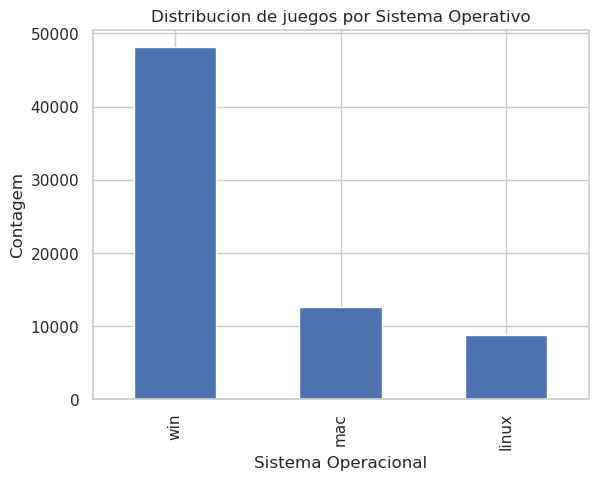

In [59]:
count_os = df[['win', 'mac', 'linux']].sum()

# Visualizacion en una grafica de barras
count_os.plot(kind='bar')
plt.xlabel('Sistema Operacional')
plt.ylabel('Contagem')
plt.title('Distribucion de juegos por Sistema Operativo')
plt.show()

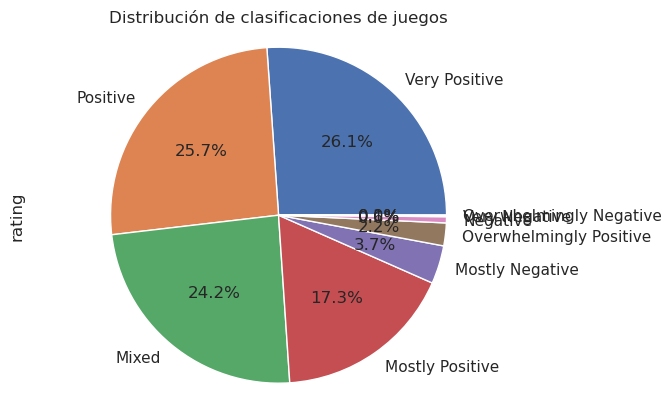

In [60]:
count_ratings = df['rating'].value_counts()


count_ratings.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribución de clasificaciones de juegos')
plt.show()

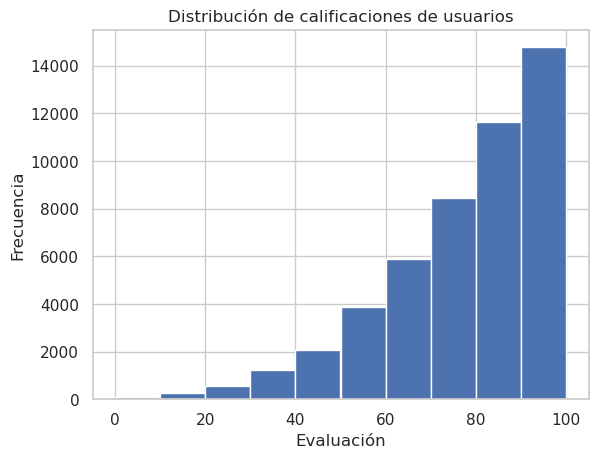

In [61]:
user_reviews_stats = df[['positive_ratio', 'user_reviews']].describe()

df['positive_ratio'].plot(kind='hist', bins=10)
plt.xlabel('Evaluación')
plt.ylabel('Frecuencia')
plt.title('Distribución de calificaciones de usuarios')
plt.show()

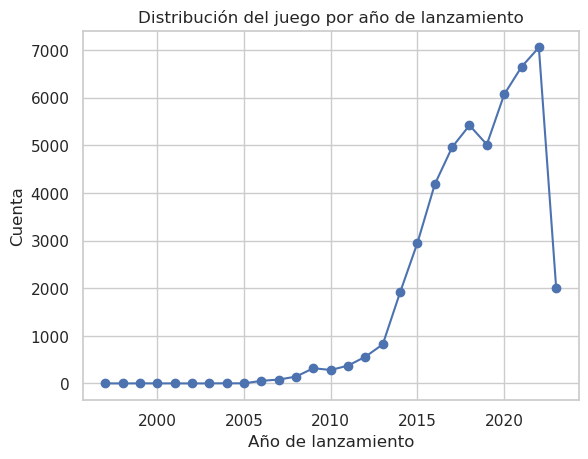

In [62]:
# Convertir la columna de data_release para escribir fecha y hora
df['date_release'] = pd.to_datetime(df['date_release'])

# Recuento de juegos por año de lanzamiento
count_release_year = df['date_release'].dt.year.value_counts().sort_index()

# Visualización en un gráfico de líneas
count_release_year.plot(kind='line', marker='o')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cuenta')
plt.title('Distribución del juego por año de lanzamiento')
plt.show()


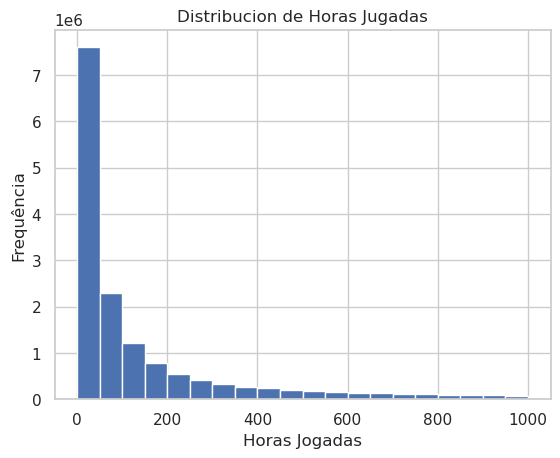

In [63]:
# Histograma de horas jugadas
rc['hours'].plot(kind='hist', bins=20)
plt.xlabel('Horas Jogadas')
plt.ylabel('Frequência')
plt.title('Distribucion de Horas Jugadas')
plt.show()

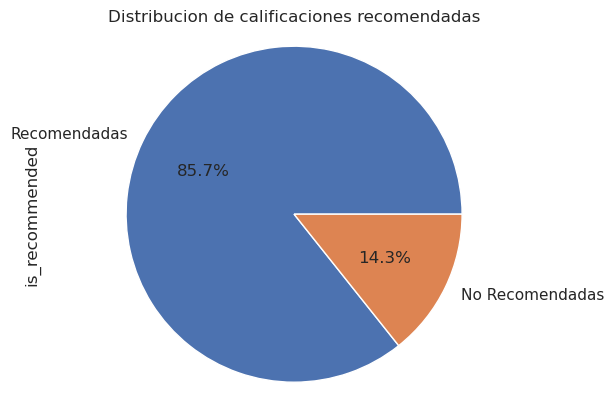

In [64]:
Recomendados = rc['is_recommended'].value_counts()

Recomendados.plot(kind='pie', autopct='%1.1f%%', labels = ['Recomendadas', 'No Recomendadas'])
plt.axis('equal')
plt.title('Distribucion de calificaciones recomendadas')
plt.show()

In [65]:

valores_sem_texto_descricao = metadata[metadata['description'].isna() | (metadata['description'] == '')]
valores_sem_texto_tags = metadata[metadata['tags'].isna() | (metadata['tags'] == '')]

print(valores_sem_texto_descricao)
print(valores_sem_texto_tags)

        app_id description                                               tags  \
2        22364                                                       [Action]   
9       271850              [Strategy, Simulation, Action, RTS, World War II]   
19      245950              [Action, RPG, FPS, Co-op, Shooter, Action RPG,...   
22      305181                                            [Adventure, Action]   
30      387440              [Action, Free to Play, MOBA, Third Person, Mul...   
...        ...         ...                                                ...   
48845  2317930              [Action, Indie, Simulation, Strategy, Gore, Vi...   
48846  2224461                                            [Action, Adventure]   
48848  2406290                [Adventure, Indie, RPG, Strategy, Singleplayer]   
48850  2399890                                                     [Strategy]   
48852  2439040              [Action, Adventure, RPG, Massively Multiplayer...   

       Zombies  World War I

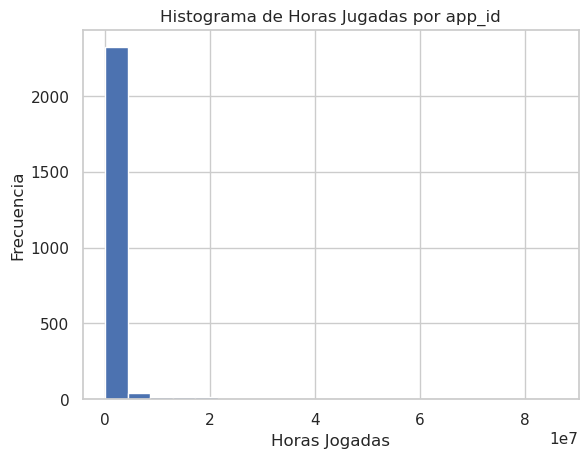

In [66]:
horas_por_app_id = rc.groupby('app_id')['hours'].sum()

#histograma
plt.hist(horas_por_app_id, bins=20)
plt.xlabel('Horas Jogadas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Horas Jugadas por app_id')
plt.show()

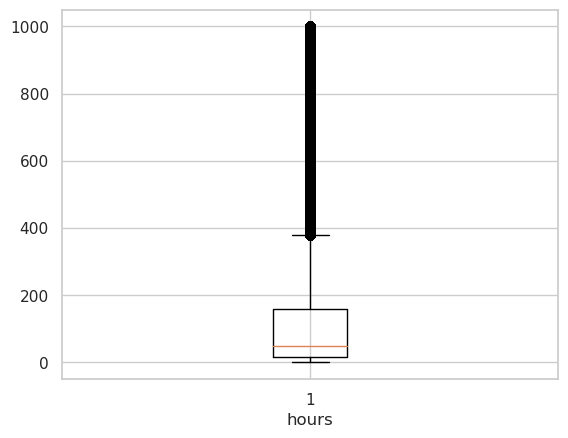

In [67]:
# Crea una figura y un eje
fig, ax = plt.subplots()

# Crea el diagrama de caja
ax.boxplot(rc['hours'])

# Definir etiqueta para el eje x
ax.set_xlabel('hours')

# Mostrar el gráfico
plt.show()

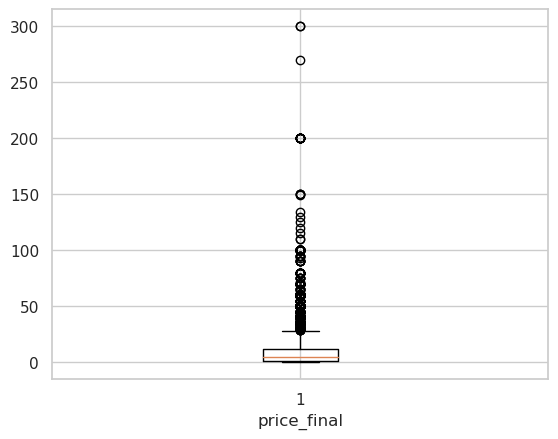

In [68]:
# Criar uma figura e um eixo
fig, ax = plt.subplots()

# Criar o boxplot
ax.boxplot(df['price_final'])

# Definir rótulo para o eixo x
ax.set_xlabel('price_final')

# Exibir o gráfico
plt.show()

In [71]:
#Agrupa las recomendaciones por su id
grouped = rc.groupby('app_id')
#Suma total de las columnas "divertidas" de los grupos
result = grouped['funny'].sum()
result = pd.DataFrame(result)
result.reset_index(inplace=True)
#Ordenar por la columna divertida, descendiendo
result = result.sort_values(by='funny', ascending=False)
result.head(10)

,app_id,funny
12,730,474122
340,271590,223325
303,252490,194212
572,377160,192424
656,413150,192119
22,4000,190528
207,221100,183120
934,578080,178024
532,359550,177962
346,275850,175854


In [72]:
#Deshacerse de algunas de las columnas
keep_cols=["app_id","title","user_reviews"]
df = df[keep_cols]
#fusionar los dataframes
finaldf = result.merge(df, on="app_id")
finaldf.head(20)

,app_id,funny,title,user_reviews
0,730,474122,Counter-Strike: Global Offensive,6941137
1,271590,223325,Grand Theft Auto V,1367837
2,252490,194212,Rust,722973
3,377160,192424,Fallout 4,193409
4,413150,192119,Stardew Valley,457664
5,4000,190528,Garry's Mod,795170
6,221100,183120,DayZ,280402
7,578080,178024,PUBG: BATTLEGROUNDS,2142372
8,359550,177962,Tom Clancy's Rainbow Six® Siege,939992
9,275850,175854,No Man's Sky,198883


In [73]:
#Agregue otra columna para encontrar la puntuación divertida por revisión
finaldf["funny/user_rev"] = (finaldf["funny"]/finaldf["user_reviews"])
#Ordenar por "gracioso/user_rev" en lugar de "gracioso"
finaldf = finaldf.sort_values(by="funny/user_rev", ascending=False)
#Deshacerse de la columna "app_id"
finaldf = finaldf.drop("app_id", axis=1)
finaldf.head(20)

,funny,title,user_reviews,funny/user_rev
842,1919,Sinking Simulator,96,19.989583
142,27107,VR Kanojo / VRカノジョ,1625,16.681231
448,6906,Arma II: DayZ Mod,437,15.803204
1024,1152,Fatty Bear's Birthday Surprise,85,13.552941
175,23255,Sakura Swim Club,2137,10.882078
321,11368,Gorilla Tag,1061,10.714420
83,45778,5D Chess With Multiverse Time Travel,5112,8.955008
328,11079,Sakura Dungeon,1316,8.418693
657,3379,YIIK: A Postmodern RPG,409,8.261614
791,2179,Disney G-Force,342,6.371345


In [74]:
#Filtrar el número de opiniones_de_usuarios para que sea mayor que la media de las opiniones_de_usuarios del conjunto de datos para tener resultados más populares
finaldf = finaldf[finaldf["user_reviews"] >= int(np.mean(finaldf["user_reviews"]))]
finaldf.head(20)

,funny,title,user_reviews,funny/user_rev
35,83882,Plague Inc: Evolved,41361,2.028046
77,47019,The Elder Scrolls IV: Oblivion® Game of the Ye...,31884,1.474689
73,48740,Tabletop Simulator,34156,1.426982
57,57800,Star Wars: Battlefront 2 (Classic 2005),41921,1.378784
92,39967,EVE Online,29938,1.334992
56,58182,Black Desert,45825,1.269656
95,38597,Fallout 3: Game of the Year Edition,30882,1.249822
50,63412,Getting Over It with Bennett Foddy,51352,1.234850
81,46265,theHunter Classic,38764,1.193504
10,161438,Fallout: New Vegas,138015,1.169713
